In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train_and_test2.csv


## Load in the unseparated dataset (complete)

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train_and_test2.csv")

## Set the index to `Passengerid` and remove any Null values from `Embarked`

In [3]:
df.set_index("Passengerid")
df.isna().sum()
df = df.dropna(subset=["Embarked"])
df.isna().sum()
df.info()
#df.Embarked.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 28 columns):
Passengerid    1307 non-null int64
Age            1307 non-null float64
Fare           1307 non-null float64
Sex            1307 non-null int64
sibsp          1307 non-null int64
zero           1307 non-null int64
zero.1         1307 non-null int64
zero.2         1307 non-null int64
zero.3         1307 non-null int64
zero.4         1307 non-null int64
zero.5         1307 non-null int64
zero.6         1307 non-null int64
Parch          1307 non-null int64
zero.7         1307 non-null int64
zero.8         1307 non-null int64
zero.9         1307 non-null int64
zero.10        1307 non-null int64
zero.11        1307 non-null int64
zero.12        1307 non-null int64
zero.13        1307 non-null int64
zero.14        1307 non-null int64
Pclass         1307 non-null int64
zero.15        1307 non-null int64
zero.16        1307 non-null int64
Embarked       1307 non-null float64
zero.17     

# 1. KNN Nearest Neighbour Method

In [4]:
#instantiate the estimator and randomly set the parameter to 3
knn = KNeighborsClassifier(n_neighbors=3)

# 1.1. Choose the feature and target column(s)

In [5]:
# features:
features = ["Age", "Sex", "Pclass", "Embarked"]
#target = ["2urvived"]
X = df[features]
# target:

y = df["2urvived"]

## Check the shape of the feature and target data:

In [6]:
print(X.shape)
print(y.shape)

(1307, 4)
(1307,)


# 1.2. Splitting the dataset into train and test

In [7]:
# create training and testing sets --> test will be 25% of the overall dataset:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=4)

## Check the shape of the train features and train targets:

In [8]:
print(X_train.shape)
print(y_train.shape)

(980, 4)
(980,)


## Check the shape of the test features and test targets:

In [9]:
print(X_test.shape)
print(y_test.shape)

(327, 4)
(327,)


## Check for any Null values in the train feature-set:

In [10]:
X_train.isna().sum()

Age         0
Sex         0
Pclass      0
Embarked    0
dtype: int64

# 1.3. Fit the model with the feature and target of the complete dataset

In [11]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# 1.4. Predict the target by passing the `X_test` data to the Classifier
- `0` represents a victim
- `1` represents a survivor

In [12]:
kn_pred = knn.predict(X_test)
print(kn_pred)

[0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0]


# 2. Logistic Regression Method
# 2.1. Creating the Classifier
# 2.2. Fitting the Classifier with the training data
# 2.3. Using the test-features to predict the targets

In [13]:
logreg = LogisticRegression(max_iter = 1000)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
weights = list(zip(features, logreg.coef_))
weights = pd.DataFrame(weights)
weights.columns = ['Feature', 'Weight']
weights.set_index('Feature', inplace=True)
weights.sort_values(by='Weight', inplace=True)
weights

,Weight
Feature,
Age,"[-0.026322293233789516, 1.7370504388411845, -0..."


# 3. Comparing the accuracy of both methods

In [15]:
print("Logistic Regression", metrics.accuracy_score(y_test, y_pred))
print("KNN",metrics.accuracy_score(y_test, kn_pred))

Logistic Regression 0.7706422018348624
KNN 0.8165137614678899


## in the above case KNN wins with the preset of n = 3

# 3.1. Evaluating the ideal value for KNN n

In [16]:
k_range = range(1,31)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))   

# 3.2. Plot the results to easily evaluate the best value for n

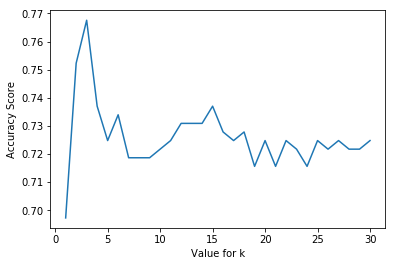

In [17]:
plt.plot(k_range, scores)
plt.xlabel("Value for k")
plt.ylabel("Accuracy Score")
plt.show()

## the optimal value for n is between 0 and 5 --> around 3

# 3.3 Visualize relationship between features and target using scatterplot

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


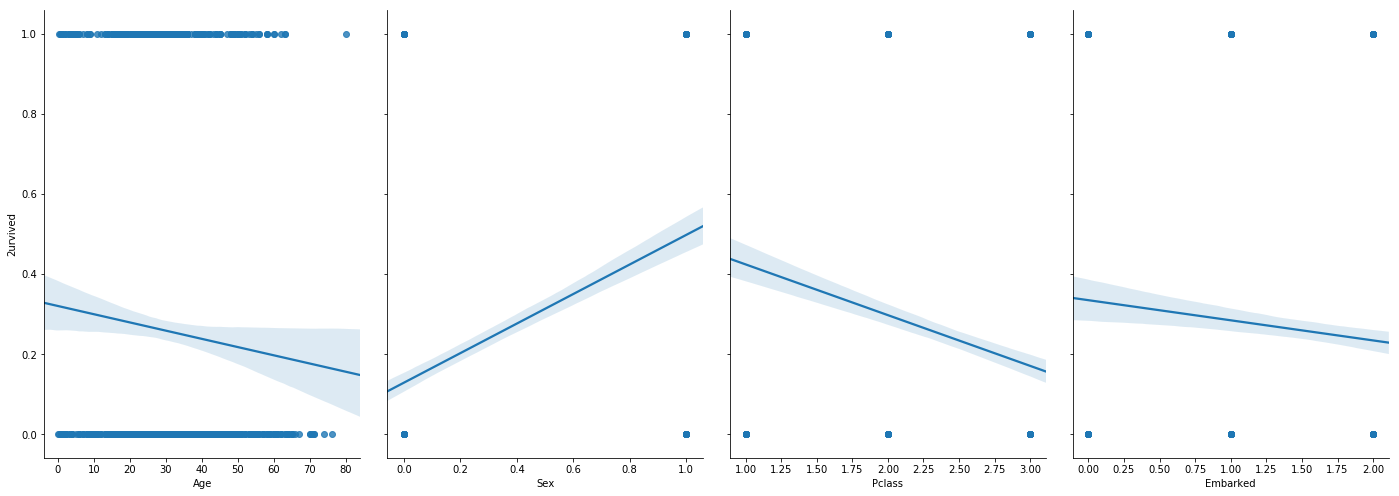

In [18]:
sns.pairplot(df, x_vars=["Age","Sex","Pclass","Embarked"], y_vars="2urvived",size=7, aspect=0.7, kind="reg")
plt.show()

# 4. Linear Regression Method
# 4.1. Instantiate Classifier
# 4.2. Fit the Model with the training data

In [19]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 4.3. Interpreting model coefficients

In [20]:
print(linreg.intercept_)
print(linreg.coef_)

0.6057090131088546
[-0.00455882  0.32313967 -0.12808028 -0.02329795]


# 4.4. Pair feature names with the coefficients

In [21]:
lin_weights = list(zip(features, linreg.coef_))
lin_weights = pd.DataFrame(lin_weights)
lin_weights.columns = ['Feature', 'Weight']
lin_weights.set_index('Feature', inplace=True)
lin_weights.sort_values(by='Weight', inplace=True)
lin_weights

,Weight
Feature,
Pclass,-0.128080
Embarked,-0.023298
Age,-0.004559
Sex,0.323140


In [22]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred))) #try to improve RMSE by removing features

0.5246230625870018


***
# Visualization
## Use seaborn (sns) to plot a chart with 2 columns: died or survived (0 or 1)

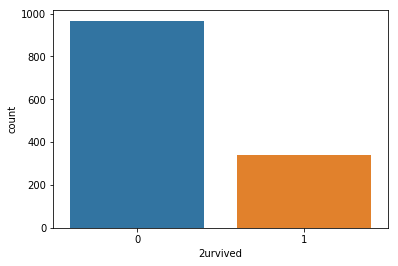

In [23]:
sns.countplot(x = "2urvived", data=df)
plt.show()

##  Use seaborn to plot a chart of survived vs. died, broken down by male vs female

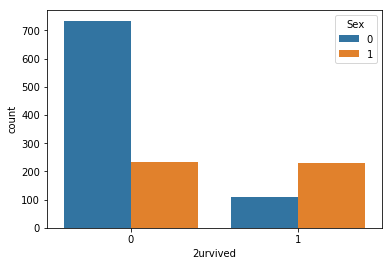

In [24]:
sns.countplot(x="2urvived", data=df, hue="Sex")
plt.show()

## Use seaborn to plot a chart of survived vs died, broken down by Pclass

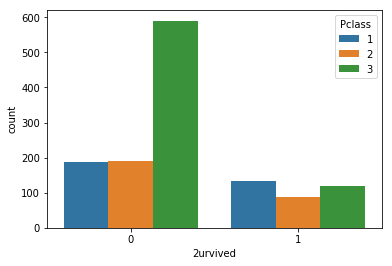

In [25]:
sns.countplot(x="2urvived", data=df, hue="Pclass")
plt.show()

# Use seaborn to plot a distribution of the amounts in Fare

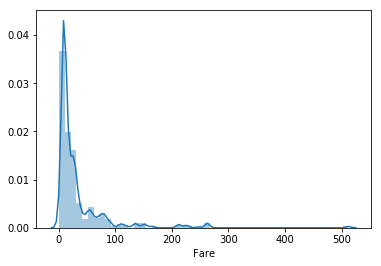

In [26]:
sns.distplot(df.Fare)
plt.show()

## Plot a histogram (using any method you like) of the data in Fare

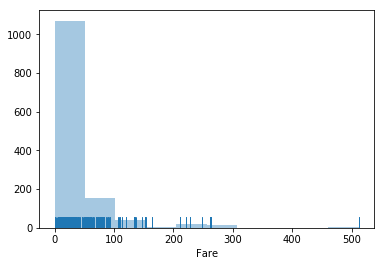

In [27]:
sns.distplot(df.Fare, bins=10, kde=False, rug=True)
plt.show()

## Calculate the correlation of each feature (column) vs. the other features (columns)

In [28]:
zero_cols = [col for col in df.columns if 'zero' not in col]
corr=df[zero_cols].corr()
corr

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
Passengerid,1.000000,0.025792,0.031945,-0.012297,-0.055696,0.008576,-0.039776,-0.051518,-0.331125
Age,0.025792,1.000000,0.176554,-0.057161,-0.189332,-0.125112,-0.375811,-0.065125,-0.060236
Fare,0.031945,0.176554,1.000000,0.184192,0.161141,0.222422,-0.557915,-0.239212,0.171942
Sex,-0.012297,-0.057161,0.184192,1.000000,0.110768,0.214371,-0.121826,-0.099408,0.401985
sibsp,-0.055696,-0.189332,0.161141,0.110768,1.000000,0.373383,0.059819,0.066055,-0.013174
Parch,0.008576,-0.125112,0.222422,0.214371,0.373383,1.000000,0.017304,0.045216,0.056183
Pclass,-0.039776,-0.375811,-0.557915,-0.121826,0.059819,0.017304,1.000000,0.187349,-0.241672
Embarked,-0.051518,-0.065125,-0.239212,-0.099408,0.066055,0.045216,0.187349,1.000000,-0.093225
2urvived,-0.331125,-0.060236,0.171942,0.401985,-0.013174,0.056183,-0.241672,-0.093225,1.000000


## Use seaborn to plot a heatmap of the correlation data

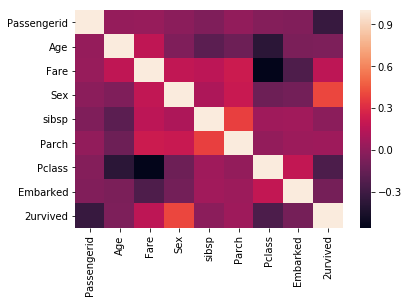

In [29]:
sns.heatmap(corr)
plt.show()

## Plot a histogram of the Age data

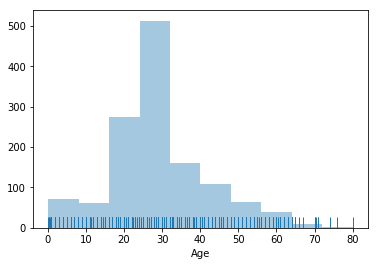

In [30]:
sns.distplot(df.Age, bins=10, kde=False, rug=True)
plt.show()

## Use Seaborn to create a boxplot of the Age data broken into the 3 Pclass columns

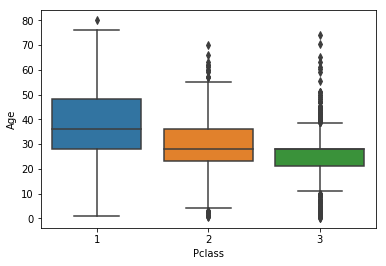

In [31]:
sns.boxplot(x="Pclass", y="Age", data=df)
plt.show()

## Use Seaborn to create a swarmplot of the Age data broken down into the 3 Pclass columns

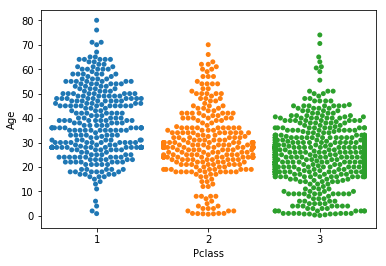

In [32]:
#sns.swarmplot(x=df["total_bill"])
sns.swarmplot(y="Age", x="Pclass", data=df)
plt.show()

# Data Wrangling
## Data Cleaning

In [33]:
print("Complete Dataset: ", df.info())
print("X_train: ", X_train)
print("y_train: ", y_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 28 columns):
Passengerid    1307 non-null int64
Age            1307 non-null float64
Fare           1307 non-null float64
Sex            1307 non-null int64
sibsp          1307 non-null int64
zero           1307 non-null int64
zero.1         1307 non-null int64
zero.2         1307 non-null int64
zero.3         1307 non-null int64
zero.4         1307 non-null int64
zero.5         1307 non-null int64
zero.6         1307 non-null int64
Parch          1307 non-null int64
zero.7         1307 non-null int64
zero.8         1307 non-null int64
zero.9         1307 non-null int64
zero.10        1307 non-null int64
zero.11        1307 non-null int64
zero.12        1307 non-null int64
zero.13        1307 non-null int64
zero.14        1307 non-null int64
Pclass         1307 non-null int64
zero.15        1307 non-null int64
zero.16        1307 non-null int64
Embarked       1307 non-null float64
zero.17     

## Calculate the average Age of the complete dataset

In [34]:
print("The average age of the passengers was: ", round(df.Age.mean(),0))

The average age of the passengers was:  29.0


##  Look at the count of unique values in Embarked to see if it has any data useful to predict survival

In [35]:
df.Embarked.unique() #already converted to numerical

array([2., 0., 1.])

## Confusion Matrix
True positive | False positive,
____|____
|
False negative | True negative

In [36]:
print(confusion_matrix(y_test, y_pred))

[[231   6]
 [ 84   6]]
